## TOI-3726 Light Curves and Fits

This is a working notebook of TOI-3726 data analysis.
- [GitHub link](https://github.com/sophia268238/astronomy_ml/blob/main/processed/TOI-3726/observation_summary.ipynb)
- [Swarthmore Planet Finder Prediction on TOI-3726](https://astro.swarthmore.edu/transits/print_transits.cgi?single_object=2&ra=&dec=&epoch=&period=&duration=&depth=&target=&observatory_string=32.416667%3B-110.731667%3BAmerica%2FPhoenix%3BMount+Lemmon&use_utc=1&observatory_latitude=32.416667&observatory_longitude=-110.731667&timezone=America%2FPhoenix&start_date=11-21-2024&days_to_print=90&days_in_past=90&minimum_start_elevation=30&and_vs_or=and&minimum_end_elevation=30&minimum_ha=-12&maximum_ha=12&baseline_hrs=1.4&minimum_depth=6&maximum_V_mag=&target_string=1226950&print_html=1&twilight=-12&max_airmass=2.4&fovWidth=&fovHeight=&fovPA=)

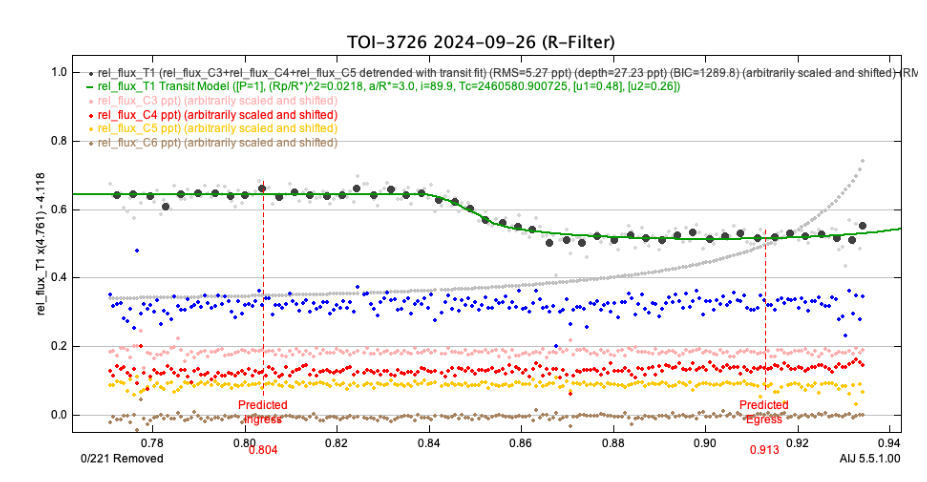

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("./20240926/Detrended_Measurements.PNG")
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

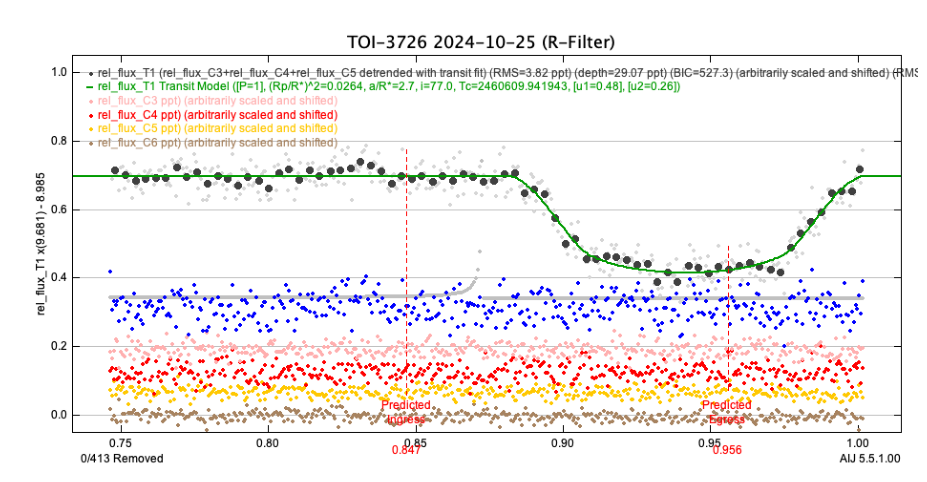

In [2]:
image = mpimg.imread("./20241025/Detrended_Measurements.PNG")
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

## Analysis

## [Transit Timing Variation (TTV)](https://en.wikipedia.org/wiki/Transit-timing_variation)

### Period Analysis

1. Period Based on the Observations on 09/26/2024 and 10/25/2024.
    - The below calculation indicates the period of the transits remains as reported by ExoMast.

In [3]:
# Tc(transit center timing)
Tc_20241025 = 2460609.941933935
Tc_20240926 = 2460580.901158166
period_exo_mast = 4.8404431 

periods = (Tc_20241025 - Tc_20240926) / period_exo_mast
print(f"The number of periods between the two transit centers is: {periods}")

The number of periods between the two transit centers is: 5.999611020925854


2. The Amount of T_c (Transit Center) Shift Compared with Swathmore Report

In [4]:
# For 09/26/2024
shift_09262024 = .901158166 - 0.8590
print(f"09-26-2024 shift: {shift_09262024 * 24 * 60}")

# For 10/25/2024
shift_10252024 = 0.941933935 - 0.9016
print(f"10-25-2024 shift: {shift_10252024 * 24 * 60}")

09-26-2024 shift: 60.70775904
10-25-2024 shift: 58.08086640000006


3. Compare TESS Sector 59 and 73 Light Curves
- For TOI-3726, TESS collected 2 sectors of data: 59 and 73. Somehow, there are two sets of data for sector 59.
- With the base BJD of 2457000, sector 59 is between (2910 - 2937 BJD) and sector 73 is between (3285 - 3313 BJD)
- The current ExoMast report was based on the data of sector 73(see the[downloaded report](./tess2023341070027-s0073-s0073-0000000122695048-00835_dvm.pdf)), even though the data of sector 59 is in no less quality.
- The flux of both sectors are individually flattened and folded with the reported transit period (4.8404431 BJD). It seems to indicate the transit center has shifted to a later time in sector 73 compared with sector 59. The amount of shift is close to the amount between the current ground follow-up observations and the sector 73. See the below comparison.
- However, I don't know how to fit the light curves and the shift is a rough estimate.
![screenshot](./TOI-3726_sector_59_73_compare.png).

## Compare the TOIs in TESS Sector 59 and 73 to Identify TTVs 
We also observed a significant shift in the TOI-3726 trasit timing between the ground follow-up observations (2024-09-25, 2024-10-25) and the TESS sector 73. We also discovered a similar significant shift of the transit timing in TOI-3726 between sector 59 and 73 in the earlier study. We also observed a similar significant shift in the trasit timeing between 2024-09-25 and the TESS sector 73.

There are a few theories about the nature of the shift:
1. A genuine TTV caused by other nearby planetary objects in the same star star system.
2. A TESS clock drift between different sectors.
3. An accumulation of the inaccuracy in the calculated period.

We can explore the the theory #2 with the current TESS data with the following procedure:
1. A few TOIs are selected randomly from [ExoFOP-TESS](https://exofop.ipac.caltech.edu/tess/view_toi.php), so that these candidates all have been observed in Sector 59 and 73.
2. The light curves are constructed using the python "lightkurve" libary, then folded and binned using their ExoMast reported transit-periods and epoch-times.
3. The light curves from sector 59 and 73 are graphed, so that the shift of the folded transits can be compared.

#### Theory #2: TESS Clock Drift
- Hypotheses
    - If this theory were true, we should observe simiar shifts in all the candidate TOIs. Such shifts should be in the same direction and by the same shift amount.

    - Otherewise, we should observe shifts of different directions and amounts. Or no significant shifts at all, as TTVs have been observed rarely.
 
- Findings
    - [Compare the TOIs in TESS Sector 59 and 73 to Identify TTVs](../../notebooks/TESS_Sector_59_and_73_Comparison.ipynb)
    - As shown in the above notebook, we discovered that significant transit-timing shifts are present in almost all candidate TOIs! Such shifts are of different directions and amounts. This discovery indicates the following two conclusions:
        - There is no TESS clock drift between sector 59 and sector 73.
        - TTVs are not as rare as they have been believed so.

#### Theory #3 Calculation Error Accumulation
- [LATTE Report](./LATTE_output/DV_report_122695048.pdf)
    - LATTE command `python -m LATTE --tic "122695048" --north --sector 59,73`
- TESS Reports
    - [Sector 59](./tess_dvm/tess2022330181042-s0059-s0059-0000000122695048-00688_dvm.pdf)
        - The DVM report for Sector 59 does not appear in ExoMast website directly. I found it when running LATTE against the Sector 59 data. In the LATTE report(at the bottom of pag 1), there is a link pointing to the Sector 59 DVM report.
    - [Sector 73](./test_dvm/tess2023341070027-s0073-s0073-0000000122695048-00835_dvm.pdf)
    - Model Prediction
      | Sector | Period (days)        | Epoch (BTJD)          |
      |--------|----------------------|-----------------------|
      | 59     | 4.84169 ± 0.00044    | 2912.8314 ± 0.0011    |
      | 73     | 4.84044 ± 0.00041    | 3290.4324 ± 0.0010    |
      | Diff % | 0.026%               |                       |
- Error Estimation
    - Based on the reported periods of the two sectors, the cumulative drifts caused by the the max error and the average error are 0.066 and 0.033 BJDs between Sector 59 and 73.
    - The actual estimated drift over the time between Sector 59 and 73 is ~0.04 BJD.
- Conclusion
    - It appears the actual drift is within the reasonable interval of the period errors. Based on this comparison, we cannot rule out that the shift has been caused by the calculated period not being precise enough.

In [5]:
# Cumulative Error Estimate:
# According to sector 59 report:
s59_begin_bjd = 2911
s59_period = 4.84169
s59_error = 0.00044

# According to sector 73 report:
s73_begin_bjd = 3289
s73_period = 4.84044
s73_error = 0.00041

max_cee_bjd = (s59_error + s73_error) * (s73_begin_bjd - s59_begin_bjd) / ((s59_period + s73_period)/2)
print(f"Estimated Max Cumulative Error over {3289 - 2911} BJDs: {max_cee_bjd:.2}")
avg_cee_bjd = ((s59_error + s73_error)/2) * (s73_begin_bjd - s59_begin_bjd) / ((s59_period + s73_period)/2)
print(f"Estimated Average Cumulative Error over {3289 - 2911} BJDs: {avg_cee_bjd:.2}")

Estimated Max Cumulative Error over 378 BJDs: 0.066
Estimated Average Cumulative Error over 378 BJDs: 0.033


### Explore TTV Possibility
#### Estimate Semi-major Axis of the Hypothetical New Planet X
    - Assuming planet-X is in the same inclination plane as TOI-3726.01, for X not to produce a transit, its semi-major axis a_X needs to satisfy:
$$a_X \ge \frac{R*}{cos(\angle inclination)}$$

    - Given the two observations on 20240926 and 20241025, we have the below calculation.

In [6]:
(2460735.810830401 - 2460735.7532) * 24 * 60

82.9877769201994

In [7]:
(1.58 + 1.68 + 1.86 + 1.66) / 4

(27.12+ 28.77+ 33.51+ 27.01)/4


29.102500000000003

In [8]:
from math import cos, pi, sin, tan
# Note the R* = 1.05 R_SUN is from https://exo.mast.stsci.edu/exomast_planet.html?planet=TOI-3726.01
ground_observation = [
    {
        "obs": "20240926",
        "a/R*": 2.854413994,
        "inclination_degree":82.669012435,
        "Rjup": 1.51,
        "R*": 1.05,
        "color": "blue",
        "Tc": 2460580.899037370,
        "depth": 26.28,
        "aperture": "6,9,13",
        "predicted": {
            "swarthmore_offset": 2450000,
            "offset": 2460580,
            "ingress": 0.8045,
            "Tc": 0.8590,
            "egress": 0.9135,
        },
    },
    {
        "obs": "20241025",
        "a/R*": 2.719625175,
        "inclination_degree": 76.643361005,
        "Rjup": 1.59,
        "R*": 1.05,
        "color": "green",
        "Tc": 2460609.941996999,
        "depth": 26.9,
        "aperture": "7,12,18",
        "predicted": {
            "swarthmore_offset": 2450000,
            "offset": 2460609,
            "ingress": 0.8471,
            "Tc": 0.9016,
            "egress": 0.9561,
        },
    },
    {
        "obs": "20241227",
        "a/R*": 2.496465454,
        "inclination_degree": 85.215975789,
        "Rjup": 1.60,
        "R*": 1.05,
        "color": "red",
        "Tc": 2460672.874482207,
        "depth": 30.11,
        "aperture": "7,11,15",
        "predicted": {
            "swarthmore_offset": 2450000,
            "offset": 2460672,
            "ingress": 0.7729,
            "Tc": 0.8274,
            "egress": 0.8819,
        },
    },
    {
        "obs": "20250205",
        "a/R*": 2.988352165,
        "inclination_degree": 77.618637084,
        "Rjup": 1.56,
        "R*": 1.05,
        "color": "orange",
        "Tc": 2460711.600440018,
        "depth": 26.02,
        "aperture": "5,8,12",
        "predicted": {
            "swarthmore_offset": 2450000,
            "offset": 2460711,
            "ingress": 0.4964,
            "Tc": 0.5509,
            "egress": 0.6055,
        },
    },
]

for entry in ground_observation:
    inclination = pi * entry["inclination_degree"] / 180
    R_new_planet = entry["R*"] / cos(inclination)
    print(f"Based on {entry['obs']}: Min Semi-major {R_new_planet} R_SUN")

for entry in ground_observation:
    tc = entry["Tc"]
    swarthmore_tc = entry["predicted"]["Tc"] + entry["predicted"]["offset"]
    delay_min = (tc - swarthmore_tc) * 24 * 60
    print(f"{entry['obs']} delay(min): {delay_min}")

Based on 20240926: Min Semi-major 8.228772975842496 R_SUN
Based on 20241025: Min Semi-major 4.545225357856192 R_SUN
Based on 20241227: Min Semi-major 12.589929890050719 R_SUN
Based on 20250205: Min Semi-major 4.896985489589229 R_SUN
20240926 delay(min): 57.653812542557716
20241025 delay(min): 58.17167870700359
20241227 delay(min): 67.7983783185482
20250205 delay(min): 71.33762553334236


In [9]:
(0.941933935 - 0.9016) * 24 * 60

58.08086640000006

In [10]:
# Use Kepler's 3rd Law to estimate the distance of the planet to the star
import math
a = math.pow((4.84 / 365), 2/3)
a

0.05602325414211839

## 20241227 Observation Data Analysis
At this point, we have done three observations on 20240926, 20241025 and 20241227. The data have been fit with AstroImageJ and the fitted Tc are compared with the predicted transit center of the Transit Finder of the Swarthmore College.
- The shift in min is as below:

| Date       | Shift (min)    |
|------------|----------------|
| 2024-09-26 | 57.77          |
| 2024-10-25 | 58.01          |
| 2024-12-27 | 74.24          |
- The Tc shifts of 20240926 and 20241025 are quite close to each other. However, the shift on 20241227 was much more signifiant of about 16 min.

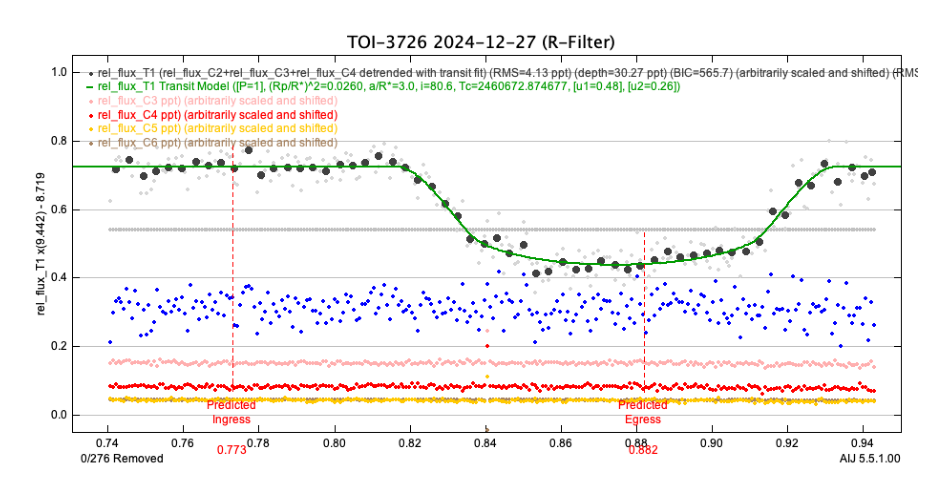

In [11]:
from IPython.display import IFrame
image = mpimg.imread("./20241227/Detrend_Measurements.PNG")
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [12]:
for entry in ground_observation:
    obs = entry["obs"]
    tc = entry["Tc"]
    predicted_tc = entry["predicted"]["offset"] + entry["predicted"]["Tc"]
    diff = (tc - predicted_tc) * 24 * 60
    print(f"{obs}: {diff:.2f} min")

20240926: 57.65 min
20241025: 58.17 min
20241227: 67.80 min
20250205: 71.34 min


In [13]:
tc_end = 2460672 + (0.7729 + 0.8819) / 2.0
tc_begin_73 =  2457000 +  3290.4324 
tc_begin_59 = 2457000 + 2912.8314

In [14]:
tc_begin_59 = 2457000 + 2912.8314
tc_begin_73 =  2457000 +  3290.4324 
tc_20241025 = 2460609.941884418
tc_20241227 = 2460672.878957585

In [15]:
# BJD converter: https://ssd.jpl.nasa.gov/tools/jdc/#/jd
tc_list = [
    {
        "name": "tc_sec_59",
        "tc_val": 2459912.8314,
        "n": 0,
        "sidereal_date": "2022-11-29 07:57:13",
        "period": 4.84169,
        "error": 0.00044,
        "source": "ExoMast sector 59 report.",
    },
    {
        "name": "tc_sec_73",
        "tc_val": 2460290.4324,
        "n": 78,
        "sidereal_date": "2023-12-11 22:22:39",
        "period": 4.84044,
        "error": 0.00041,
        "source": "ExoMast sector 73 report",
    },
    {
        "name": "tc_20240926",
        "tc_val": ground_observation[0]["Tc"],
        "n": 138,
        "sidereal_date": "2024-09-27 09:34:44",
        "source": "AstroImageJ model fit.",
    },
    {
        "name": "tc_20241025",
        "tc_val": ground_observation[1]["Tc"],
        "n": 144,
        "sidereal_date": "2024-10-26 10:36:19",
        "source": "AstroImageJ model fit.",
    },
    {
        "name": "tc_20241227",
        "tc_val": ground_observation[2]["Tc"],
        "n": 157,
        "sidereal_date": "2024-12-28 09:05:42",
        "source": "AstroImageJ model fit.",
    },
    {
        "name": "tc_20250205",
        "tc_val": ground_observation[3]["Tc"],
        "n": 165,
        "sidereal_date": "2025-02-05 02:38:30",
        "source": "AstroImageJ model fit.",
    },
]
tc_list

[{'name': 'tc_sec_59',
  'tc_val': 2459912.8314,
  'n': 0,
  'sidereal_date': '2022-11-29 07:57:13',
  'period': 4.84169,
  'error': 0.00044,
  'source': 'ExoMast sector 59 report.'},
 {'name': 'tc_sec_73',
  'tc_val': 2460290.4324,
  'n': 78,
  'sidereal_date': '2023-12-11 22:22:39',
  'period': 4.84044,
  'error': 0.00041,
  'source': 'ExoMast sector 73 report'},
 {'name': 'tc_20240926',
  'tc_val': 2460580.89903737,
  'n': 138,
  'sidereal_date': '2024-09-27 09:34:44',
  'source': 'AstroImageJ model fit.'},
 {'name': 'tc_20241025',
  'tc_val': 2460609.941996999,
  'n': 144,
  'sidereal_date': '2024-10-26 10:36:19',
  'source': 'AstroImageJ model fit.'},
 {'name': 'tc_20241227',
  'tc_val': 2460672.874482207,
  'n': 157,
  'sidereal_date': '2024-12-28 09:05:42',
  'source': 'AstroImageJ model fit.'},
 {'name': 'tc_20250205',
  'tc_val': 2460711.600440018,
  'n': 165,
  'sidereal_date': '2025-02-05 02:38:30',
  'source': 'AstroImageJ model fit.'}]

In [16]:
# Calculate the best average period using the first sector 59 transit and the last ground observation on 20241227.
# The elapsed time spans 2.081 years, which is a good average covering nearly two sinusoidal Romer period.
best_period = (tc_list[5]["tc_val"] - tc_list[0]["tc_val"]) / 165
best_period

4.8410244849566935

In [17]:
# Calculate the ground observation based period using the 20241025 and 20241227 data.
ground_obs_period = (tc_list[4]["tc_val"] - tc_list[3]["tc_val"]) / 13
ground_obs_period

4.84096040060887

In [18]:
from datetime import date
from math import sin, pi

C_IN_KM_PER_SEC = 299792.458
EARTH_AVG_OBITAL_RADIUS_KM = 1.496e8
EARTH_SIDEREAL_PERIOD = 365.2564
DAYS_IN_2024 = 366

d_2022_autumn_equinox = date(2022, 9, 22)
d_2023_autumn_equinox = date(2023, 9, 23)
d_2024_autumn_equinox = date(2024, 9, 22)

theta_3726 = (5 * 60 * 60  + 9 * 60 + 11) / (24 * 60 * 60) * 2 * pi # The angle of the TOI-3726's RA=05:09:11

d_20240926 = date(2024, 9, 26)
d_20241025 = date(2024, 10, 25)
d_20241227 = date(2024, 12, 27)

def calc_avg_velocity(d1, d2, d_autumn_equnox, offset_angle, days_in_year=EARTH_SIDEREAL_PERIOD, radius=EARTH_AVG_OBITAL_RADIUS_KM):
    """Calculate the average vertical velocity between d1 and d2 when the Earth is projected to the axis defined by the offset angle."""
    alpha = (d1 - d_autumn_equnox).days / days_in_year * 2 * pi + offset_angle
    beta = (d2 - d_autumn_equnox).days / days_in_year * 2 * pi + offset_angle
    days_diff = (d2 - d1).days
    vertical_displacement = (sin(beta) - sin(alpha)) * radius
    vertical_velocity_km_sec = vertical_displacement / days_diff / 24 / 60 / 60
    return vertical_velocity_km_sec

def doppler_period(p_original, v=C_IN_KM_PER_SEC, v_source=0, v_observer=0):
    """Calculate the doppler effect on a original period.
    p_original: The original period when the source and the observer are relative stationary.
    v: The speed of the wave in the medium (e.g., speed of sound in air or speed of light in vacuum).
    v_source: the velocity of the source relative to the medium (positive if moving toward the observer).
    v_observer: the velocity of the observer relative to the medium (positive if moving toward the source).   
    """
    return p_original * (v - v_source) / (v + v_observer)
    

In [19]:
d_list = [
    (d_20240926, d_20241025, d_2024_autumn_equinox),
    (d_20241025, d_20241227, d_2024_autumn_equinox),
    (date(2022, 11, 29), date(2022, 12, 24), d_2022_autumn_equinox),
    (date(2023, 12, 11), date(2024, 1, 4), d_2023_autumn_equinox),
]
print(best_period)

for d1, d2, d_autum_equinox in d_list:
    v_observer = calc_avg_velocity(d1, d2, d_2024_autumn_equinox, (0.5 * pi - theta_3726))
    p_theo_observer = doppler_period(best_period, v_observer=v_observer)
    print(f"{d1} - {d2}: v_earth: {v_observer:.3} km/sec,  \t p_theo_obs: {p_theo_observer}")

4.8410244849566935
2024-09-26 - 2024-10-25: v_earth: 25.3 km/sec,  	 p_theo_obs: 4.8406162454187465
2024-10-25 - 2024-12-27: v_earth: 6.73 km/sec,  	 p_theo_obs: 4.840915882241646
2022-11-29 - 2022-12-24: v_earth: -0.807 km/sec,  	 p_theo_obs: 4.841037523922112
2023-12-11 - 2024-01-04: v_earth: -6.48 km/sec,  	 p_theo_obs: 4.841129048345053


## Explor the Romer Effect and the Doppler Effect

### Important: Ignore the conclusion of the below analysis as the observation is in BJD which has already taken the Roemer effect into consideration. In other words, the timing is already with respect to the Barycenter of the solar system.

### Basic Data

| Name         | TC Value           | N   | Sidereal Date        | Period   | Error   | Source                        |
|--------------|--------------------|-----|-----------------------|----------|---------|-------------------------------|
| tc_sec_59    | 2459912.8314       | 0   | 2022-11-29 07:57:13   | 4.84169  | 0.00044 | ExoMast sector 59 report.     |
| tc_sec_73    | 2460290.4324       | 78  | 2023-12-11 22:22:39   | 4.84044  | 0.00041 | ExoMast sector 73 report      |
| tc_20241025  | 2460609.941884418  | 144 | 2024-10-26 10:36:19   | -        | -       | AstroImageJ model fit.        |
| tc_20241227  | 2460672.878957585  | 157 | 2024-12-28 09:05:42   | -        | -       | AstroImageJ model fit.        |

- The sidereal dates were converted using https://ssd.jpl.nasa.gov/tools/jdc/#/jd
- The sector 59 and sector 73 TCs and periods were taken from the ExoMast reports.

### The Romer Effect and the Doppler Effect
- When the Earth revolves around the Sun, it generates a sinusoildal fluctuation on the observed exoplanet transit period which is known as the Romer effect. Fundamentally, it is caused by the Doppler effect.
- During the 2024 fall-winter time, the Earth is moving toward TOI-3726 as it revolves around the Sun. This movement creates a small blue-shift due to the Doppler effect.
- Such blue-shift causes the observed period to be shorter than the actually host star transit period.
- The host star transit period is approximated by the average of the observed period between the first transit observed in sector 59 and the ground observed transit on 20241227 (where the full transit was captured).

### Calculation
- `p_avg`: the average period
  - The t_c of the first transit occurred in sector 59 had a value of `2459912.8314`.
  - The t_c of the model fit transit on 20241227 was at `2460672.878957585`.
  - These two t_c(s) have 157 periods in between, which covers 2.08 years. This close-to 2-year time span works well in averaging the sinusoidal Romer effect.
  - `p_avg = (2460672.878957585 - 2459912.8314) / 157 = 4.841067245763958`
- `p_real_obs_20241025_20241227`: the real observed period between 20241025 to 20241227 (13 periods)
    - `p_real_obs_20241025_20241227 = (2460672.878957585 - 2460609.941884418) / 13 = 4.841313320534447`
- `p_theo_obs_xxx`: the calculated period at different times with the corrections from the Doppler Effect
```2024-09-26 - 2024-10-25: vel(km/sec): 2.5e+01, p_theo_obs: 4.840659002620029
2024-09-26 - 2024-10-25: v_earth: 25.3 km/sec,  	 p_theo_obs: 4.840659002620029
2024-10-25 - 2024-12-27: v_earth: 6.73 km/sec,  	 p_theo_obs: 4.840958642089622
2022-11-29 - 2022-12-24: v_earth: -0.807 km/sec,  	 p_theo_obs: 4.84108028484455
2023-12-11 - 2024-01-04: v_earth: -6.48 km/sec,  	 p_theo_obs: 4.841171810075927
```
- Note, each 0.0001 BJE is 8.64 seconds
### Analysis
- [The observations and the Earth Movement diagram](https://docs.google.com/presentation/d/1rAB1NtzZ529OIQx1gWMENtRKPPdKGVx2gu6bvJ2GN1o/edit#slide=id.p)
- By comparing the calculated result, we found that the `p_real_obs_20241025_20241227` is greater than the `p_avg` by 21.26 sec.
### Discussion
- The above difference is small. Is it significant?
- The p_avg is quite accurate, as it is an average of 157 periods.
- The AstroImageJ does not provide an error for the calculated values. I wonder how accurate the data is?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
tc_df = pd.DataFrame(tc_list)
tc_df['pred_59'] = (tc_df['n'] - tc_df['n'].iloc[0])* tc_df['period'].iloc[0] + tc_df['tc_val'].iloc[0]
tc_df['pred_73'] = (tc_df['n'] - tc_df['n'].iloc[1])* tc_df['period'].iloc[1] + tc_df['tc_val'].iloc[1]
tc_df['pred_59_diff'] = tc_df['tc_val'] - tc_df['pred_59']
tc_df['pred_73_diff'] = tc_df['tc_val'] - tc_df['pred_73']
tc_df['rel_bjd_59'] = tc_df['tc_val'] - tc_df['tc_val'].iloc[0]
tc_df['tc_val_2450000'] = tc_df['tc_val'] - 2450000
tc_df['pred_73_2450000'] = tc_df['pred_73'] - 2450000
tc_df['pred_59_2450000'] = tc_df['pred_59'] - 2450000


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def extend(X, Y, x_min, x_max):
    slope = (Y[1] - Y[0]) / (X[1] - X[0])  # (y2 - y1) / (x2 - x1)
    intercept = Y[0] - slope * X[0]  # y = mx + b -> b = y1 - m*x1
    
    # Extend the x range beyond the endpoints
    x_extended = np.linspace(x_min, x_max, 2)  # Extend range by 2 units on both sides
    y_extended = slope * x_extended + intercept  # Calculate y values for the extended range

    return x_extended, y_extended


In [22]:
0.002 * 24 * 60
20.7 * 13 / 60
0.5 * math.sqrt(38 * 38 + 35 * 35)
(4.8411 - 4.84107) * 24 * 60 * 60

2.5919999999786114

RSE: 3.49 mins
Slope (m): 4.841039499185533
Standard Error of Slope (SE_m): 1.706001907935361e-05
95% Confidence Interval for Slope: [4.840992132979066, 4.8410868653920005]
Slope (m): 4.841039499185533
Intercept (b): 2459912.8318030247
r^2: 0.9999999999503245
Fitted DataFrame:
          name        tc_val    n        sidereal_date   period    error  \
0    tc_sec_59  2.459913e+06    0  2022-11-29 07:57:13  4.84169  0.00044   
1    tc_sec_73  2.460290e+06   78  2023-12-11 22:22:39  4.84044  0.00041   
2  tc_20240926  2.460581e+06  138  2024-09-27 09:34:44      NaN      NaN   
3  tc_20241025  2.460610e+06  144  2024-10-26 10:36:19      NaN      NaN   
4  tc_20241227  2.460673e+06  157  2024-12-28 09:05:42      NaN      NaN   
5  tc_20250205  2.460712e+06  165  2025-02-05 02:38:30      NaN      NaN   

                      source       pred_59       pred_73  pred_59_diff  \
0  ExoMast sector 59 report.  2.459913e+06  2.459913e+06      0.000000   
1   ExoMast sector 73 report  2.460290e+0

Text(0, 0.5, 'Tc_obs - Tc_pred (min)')

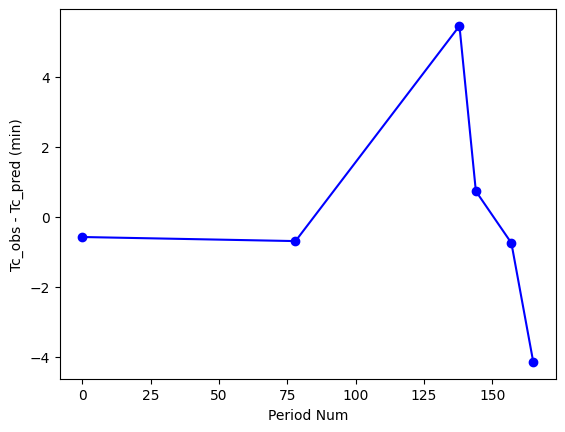

In [23]:
from sklearn.metrics import r2_score
from scipy import stats


# Fit using sec_59, sec_73, 20241025, 20241227 data
X = tc_df[['n']].iloc[[i for i in range(len(tc_df)) if i in[0, 1, 2, 3, 4, 5]]]  # Independent variable (must be 2D for scikit-learn)
y = tc_df['tc_val'].iloc[[i for i in range(len(tc_df)) if i in[0, 1, 2, 3, 4, 5]]]    # Dependent variable

# Fit using sec_59, sec_73, 20241227 data
#X = tc_df[['n']].iloc[[i for i in range(len(tc_df)) if i not in[2, 3]]]  # Independent variable (must be 2D for scikit-learn)
#y = tc_df['tc_val'].iloc[[i for i in range(len(tc_df)) if i not in[2, 3]]]    # Dependent variable

# Fit using sec_59, sec_73 data
#X = tc_df[['n']].iloc[:2]  # Independent variable (must be 2D for scikit-learn)
#y = tc_df['tc_val'].iloc[:2]    # Dependent variable

# Fit using sec_59, 20241227 data
#X = tc_df[['n']].iloc[0::4]  # Independent variable (must be 2D for scikit-learn)
#y = tc_df['tc_val'].iloc[0::4]    # Dependent variable

model = LinearRegression()
model.fit(X, y)
# Coefficients and intercept
slope = model.coef_[0]  # The slope (m)
intercept = model.intercept_  # The intercept (b)

y_pred = model.predict(X)

# Calculate Residuals
residuals = y - y_pred

# Residual Standard Error (RSE)
RSE = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
print(f"RSE: {RSE * 24 * 60:.2f} mins")

# Standard Error of the Slope (SE_m)
SE_m = RSE / np.sqrt(np.sum((X - np.mean(X))**2))[0]

# Confidence Interval (95%)
t_value = stats.t.ppf(1 - 0.025, df=len(X) - 2)
CI_lower = slope - t_value * SE_m
CI_upper = slope + t_value * SE_m

print(f"Slope (m): {slope}")
print(f"Standard Error of Slope (SE_m): {SE_m}")
print(f"95% Confidence Interval for Slope: [{CI_lower}, {CI_upper}]")


fitted_slope = slope

# Predict using the fitted model
tc_df['y_pred'] = model.predict(tc_df[['n']])


# The diff between the actual and the model
tc_df['diff'] = tc_df['tc_val'] - tc_df['y_pred']

# Output results
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print("r^2:", r2_score(tc_df['tc_val'], tc_df['y_pred']))

print("Fitted DataFrame:")
print(tc_df)

plt.plot(tc_df['n'], tc_df['diff'] * 24 * 60, marker='o', linestyle='-', color='b', label='Line with circles')
plt.xlabel('Period Num')  # Optional: Label for the x-axis
plt.ylabel(f"Tc_obs - Tc_pred (min)")  # Optional: Label for the y-axis

## The Accuracy of the Calculated Periods of Sector 59 and 73
- When we plot the predicated Tc of the sector 59 and 73 against the observed Tc, we notice a linear trend in each case. The trends indicate that the sector 59 prediction overestimates the real period, while the sector 73 underestimates the real period. Note that the Tc shifts we see in our AIJ analysis are caused the result of the sector 73 prediction, which is also what the Swarthmore Transit Finder uses.

- It's not surprising the results of both TESS sectors are not accurate. The TESS sector predictions have been based on a short observation of less than six successive periods. When the observation range is extended to two years, a small inaccuracy in the period can be accumulated to a significant shift.

## A More Accurate Estimated Period - P_accurate
- Given our current longer horizon observation data, we can estimate this by fitting a linear model.
- When choosing what data to include in the fitting, we should exlcude the incomplete 20240926 transit observation.
- With Sector 59, 73, 20241025, and 20241227 data, the fitted result is as below:
    ```
        Slope (m): 4.841059536739922
        Intercept (b): 2459912.8307693945
        r^2: 0.9999999999712603
    ```
- Because this fitted time range covers very close to 2 whole years (2.08 years), this period is an average period over the sinugolidal Romer effect due to the period fluctuation caused by the Earth revolving aroud the Sun.

## Sinusoidal Roemer Effect Analysis
- With the above `P_accurate`, we can apply it to the Sinusoidal Romer Effect analysis describe in the previous section. This `P_accurate` is slightly different from the estimated period using only the sector 59 and 20241227 data, but it would arrive to the same colusion as before.

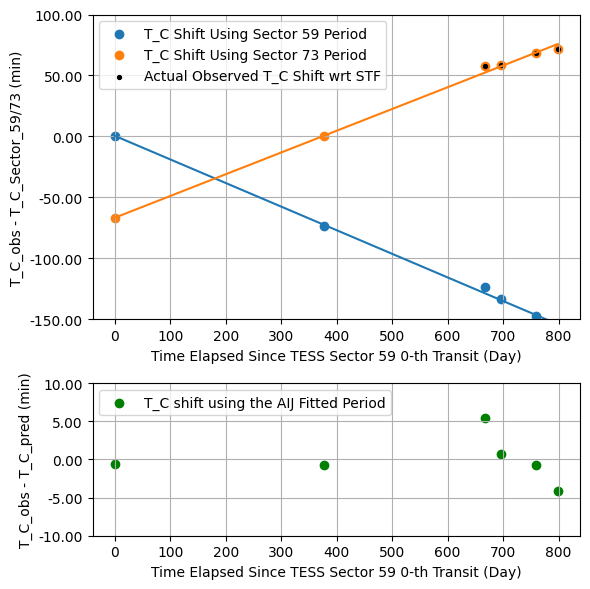

In [24]:
from matplotlib.ticker import FuncFormatter

def custom_format(y, pos):
    return f'{y:.2f}'  # Format to 2 decimal places
scalar_uint = "min"
scalar = 24 * 60
model_59 = LinearRegression()
model_59.fit(tc_df[['rel_bjd_59']], tc_df['pred_59_diff'])
y_pred_59 = model_59.predict(tc_df[['rel_bjd_59']])

model_73 = LinearRegression()
model_73.fit(tc_df[['rel_bjd_59']], tc_df['pred_73_diff'])
y_pred_73 = model_73.predict(tc_df[['rel_bjd_59']])

model_fitted = LinearRegression()
model_fitted.fit(tc_df[['rel_bjd_59']], tc_df['diff'])
y_pred_fitted = model_fitted.predict(tc_df[['rel_bjd_59']])
    
fig, axes = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [2, 1]})

# axes[0].set_title("Linear Drift between the Observed and Predicted T_C Caused by\nthe Over/underestimated Sector 59 and 73 Periods")
axes[0].plot(tc_df['rel_bjd_59'], y_pred_59 * scalar)
axes[0].plot(tc_df['rel_bjd_59'], y_pred_73 * scalar)
axes[0].scatter(tc_df['rel_bjd_59'], tc_df['pred_59_diff'] * scalar, label="T_C Shift Using Sector 59 Period")
axes[0].scatter(tc_df['rel_bjd_59'], tc_df['pred_73_diff'] * scalar, label="T_C Shift Using Sector 73 Period")
axes[0].scatter(tc_df['rel_bjd_59'][2:], tc_df['pred_73_diff'][2:] * scalar, label="Actual Observed T_C Shift wrt STF", s=8, c="black")
axes[0].set_ylim(-150, 100)
axes[0].set_ylabel(f"T_C_obs - T_C_Sector_59/73 ({scalar_uint})")
axes[0].set_xlabel("Time Elapsed Since TESS Sector 59 0-th Transit (Day)")



# axes[1].plot(tc_df['rel_bjd_59'], y_pred_fitted * scalar, c='green')
axes[1].scatter(tc_df['rel_bjd_59'], tc_df['diff'] * scalar, c='green', label="T_C shift using the AIJ Fitted Period")
axes[1].set_ylim(-10, 10)
axes[1].set_ylabel(f"T_C_obs - T_C_pred ({scalar_uint})")
axes[1].set_xlabel("Time Elapsed Since TESS Sector 59 0-th Transit (Day)")

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(custom_format))
    ax.grid()
    ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig("sector_59_and_73_drift.svg", format="svg")

## Prediction of the Tc of 20250205 as of 20250120
The transit on 20250205 is the 165th transit after the sector 59.
- The Swarthmore Transit Finder predicted Tc is `2460711.5509` (2025-02-05 01:13:18 UTC).
- The fitted model predicted Tc is `2460711.6062235623` (2025-02-05 02:32:58 UTC).
- The diff between the above two predictions is `79.67` min.
- Compare the Tc from Swarthmore, our fitted prediction and the AIJ actual fitted value:

| Source     | Tc (BJD)           | Minus Swarthmore (min) | Minus FIT (min) | Minus AIJ (min) |
|------------|--------------------|------------------------|-----------------|-----------------|
| Swarthmore | 2460711.5509       | 0                      | -79.67          | -85.20          |
| FIT        | 2460711.6062235623 | 79.67                  | 0               | -5.53           |
| AIJ        | 2460711.610065628  | 85.20                  | 5.53            | 0               |


In [25]:
tc_swarthmore_20250205 = 2460711.5509

tc_aij_20250205 = 2460711.610065628
tc_model_20250205 = slope * tc_list[5]["n"] + tc_list[0]["tc_val"]
print((tc_model_20250205 - tc_aij_20250205) * 24 * 60)
print((tc_model_20250205 - tc_swarthmore_20250205) * 24 * 60)

-10.293497443199158
74.90500643849373


### Discussion about Radial Movement
#### Question:
- According to [Simbad data](https://simbad.cds.unistra.fr/simbad/sim-id?Ident=toi-3726&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id), there is a relative radial movement of TOI-3726 with respect to the Sun: `Radial velocity/Redshift/cz:V(km/s) 42.16 [3.65]`
- If we take Swarthmore Transit Finder's period (the same as TESS Sector 73) as a pre-redshifted period and apply the 42.16km/sec radial velocity, we would come very closed to the newly proposed period based on the ground observations.
- Is this a coincidence or does it suggest something significant?
#### Analysis:
- The Argument from a Thought Experiment of Doppler Effect
    - Thought Experiment Setup
        - Redshift is a result of the Doppler effect, so we can use the fire engine and its siren as the example to illustrate the argument. There are three scenarios as below:
      
|Fire Engine Movement wrt the Observer| Sound Frequency Heard by the Observer|
|-------------------------------------|--------------------------------------|
|Away at a Constant Speed             | f_1                                  |
|Stationary                           | f_0                                  |
|Toward at a Constant Speed           | f_2                                  |
       - Let's pretend the observer closes his/her eyes the entire time. Let's the further pretend that fire engine is equipped with a volume-adjustment device, so that the observer cannot detect the loudness change of the siren as the fire engine moves.
    - Analysis
        - In such a set up, the observer will not be able to distinguish the above three scenarios without other references. In other words, even though the Doppler effect is reflected by f_1 and f_2, the observer can only hear a constant pitch of the sound, therefore, will not able to tell the kind of fire engine movement.
        - This is simiar to our observation of TOI-3726. As TESS is a satellite of the Earth, we can consider it moves as a unit along with the Earth with respect to TOI-3726.
        - The observed transit frequency (1/period) is like the f_1 in the fire engine experiment. Because of the vast 1600 light-year distance between the two star systems, the overall TOI-3726 brightness reduction due to its 42 km/s away radial movement cannot be detected in a short time frame of a few years. This is similar to the fire engine observer not being able to sense the loudness change of the siren. Therefore, the observed transit frequency/period has already included the Doppler effect, but we cannot isolate the radial-movement effect based purely on our photometric data.
- The Argument of the TESS Sector 59
    - Based on our previous analysis, we have concluded that Swarthmore Transit Finder uses the TESS Sector 73 result for its transit timing prediction (shown in the 4.2.1 section of our paper).
    - However, this choice of using Sector 73 seems quite arbitary, as TESS Sector 59 could have been used for the prediciton instead. In fact, Sector 59 could have been a better predictor as it captured 5 transit events, while Sector 73 only captured 3 transit events.
    - If we had used the Sector 59 data in the Swarthmore Tranit Finder prediction model, we would find the observed transit events occurring earlier than the predicted transits instead of later (see the diagram above in the Roemer effect section).
    - And if we tried to derive the radial velocity based on the Sector 59 data as we did with Sector 73, we would arrive to a conclusion that TOI-3726 is moving toward the Sun with some velocity, a blue shift instead!
#### Conclusion
- Based on the above two arguments, the ~42 km/sec radial movement interpretation should have been a coincidence instead of a refection of the actual radial movement between the two star systems.

# Future T_C Predictions

In [26]:
import astropy as ap
slope, intercept = 4.841065968073778, 2459912.8305619336
for i in range(165, 185):
    bjd_value = slope * i + intercept
    utc_iso = ap.time.Time(bjd_value, format='jd', scale='tdb').to_value('iso')
    print(f"{bjd_value:.5f}", utc_iso)

AttributeError: module 'astropy' has no attribute 'time'

In [ ]:
print(ap.__citation__)